# Part 1a – Confounder, Collider, and Mediator

Explanation  
- **Confounder:** A variable that influences both the explanatory variable (X) and the outcome (Y). If not controlled, it creates a spurious correlation.  
- **Collider:** A variable that is affected by two (or more) variables. Conditioning on a collider can induce a false correlation between its causes.  
- **Mediator:** A variable that lies on the causal pathway between X and Y, transmitting part of the effect of X on Y.  

Economics Examples  
1. **Confounder (Income as a confounder):**  
- **X:** Education level  
- **Y:** Luxury goods consumption  
- **Confounder:** Income (affects both education and consumption).  
DAG:  
Income → Education → Consumption  
Income → Consumption  

2. **Collider (Hiring decision as collider):**  
- **X:** Work experience  
- **Y:** University prestige  
- **Collider:** Being hired (depends on both experience and prestige).  
DAG:  
Experience → Hiring ← Prestige  

3. **Mediator (Credit as mediator):**  
- **X:** Low interest rate policy  
- **Y:** Economic growth  
- **Mediator:** Access to credit (policy influences credit, credit influences growth).  
DAG:  
Low interest rate → Credit → Growth  


In [7]:
import Pkg
Pkg.add("Compose")
Pkg.add(["Graphs", "GraphMakie", "CairoMakie", "Compose"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [a81c6b42] + Compose v0.9.6
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


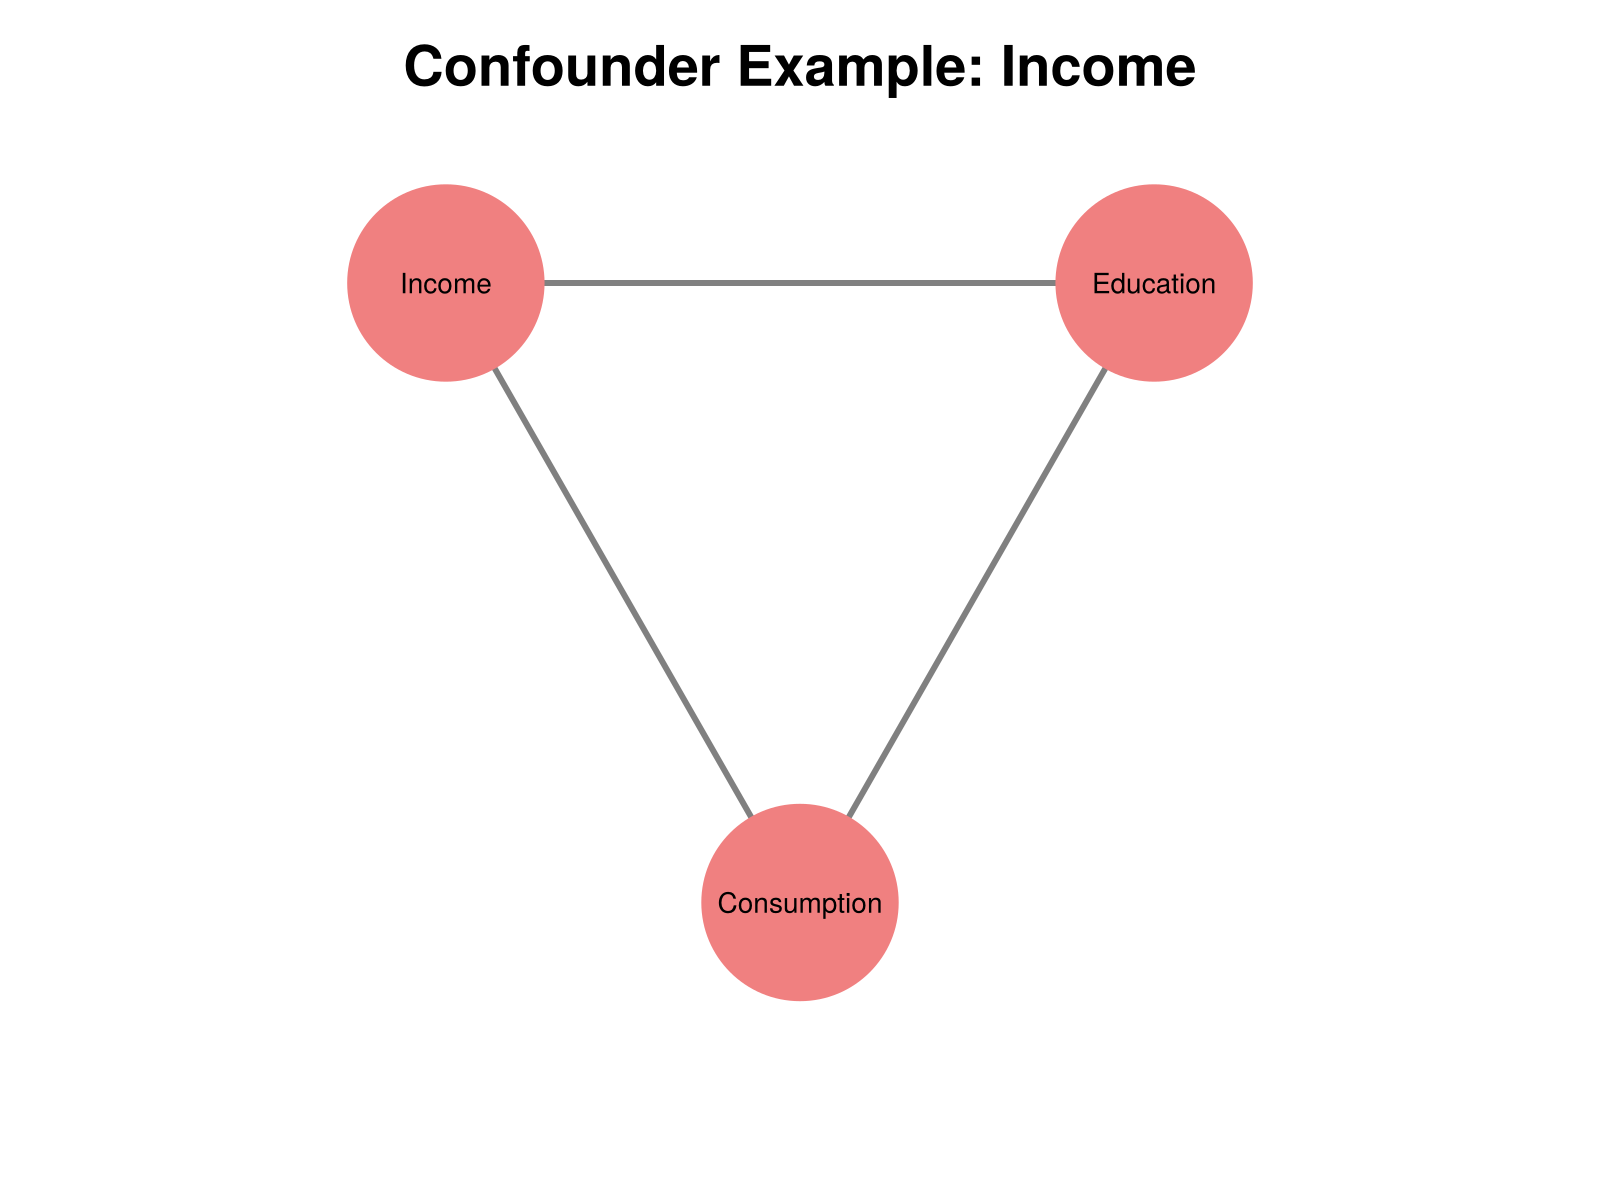

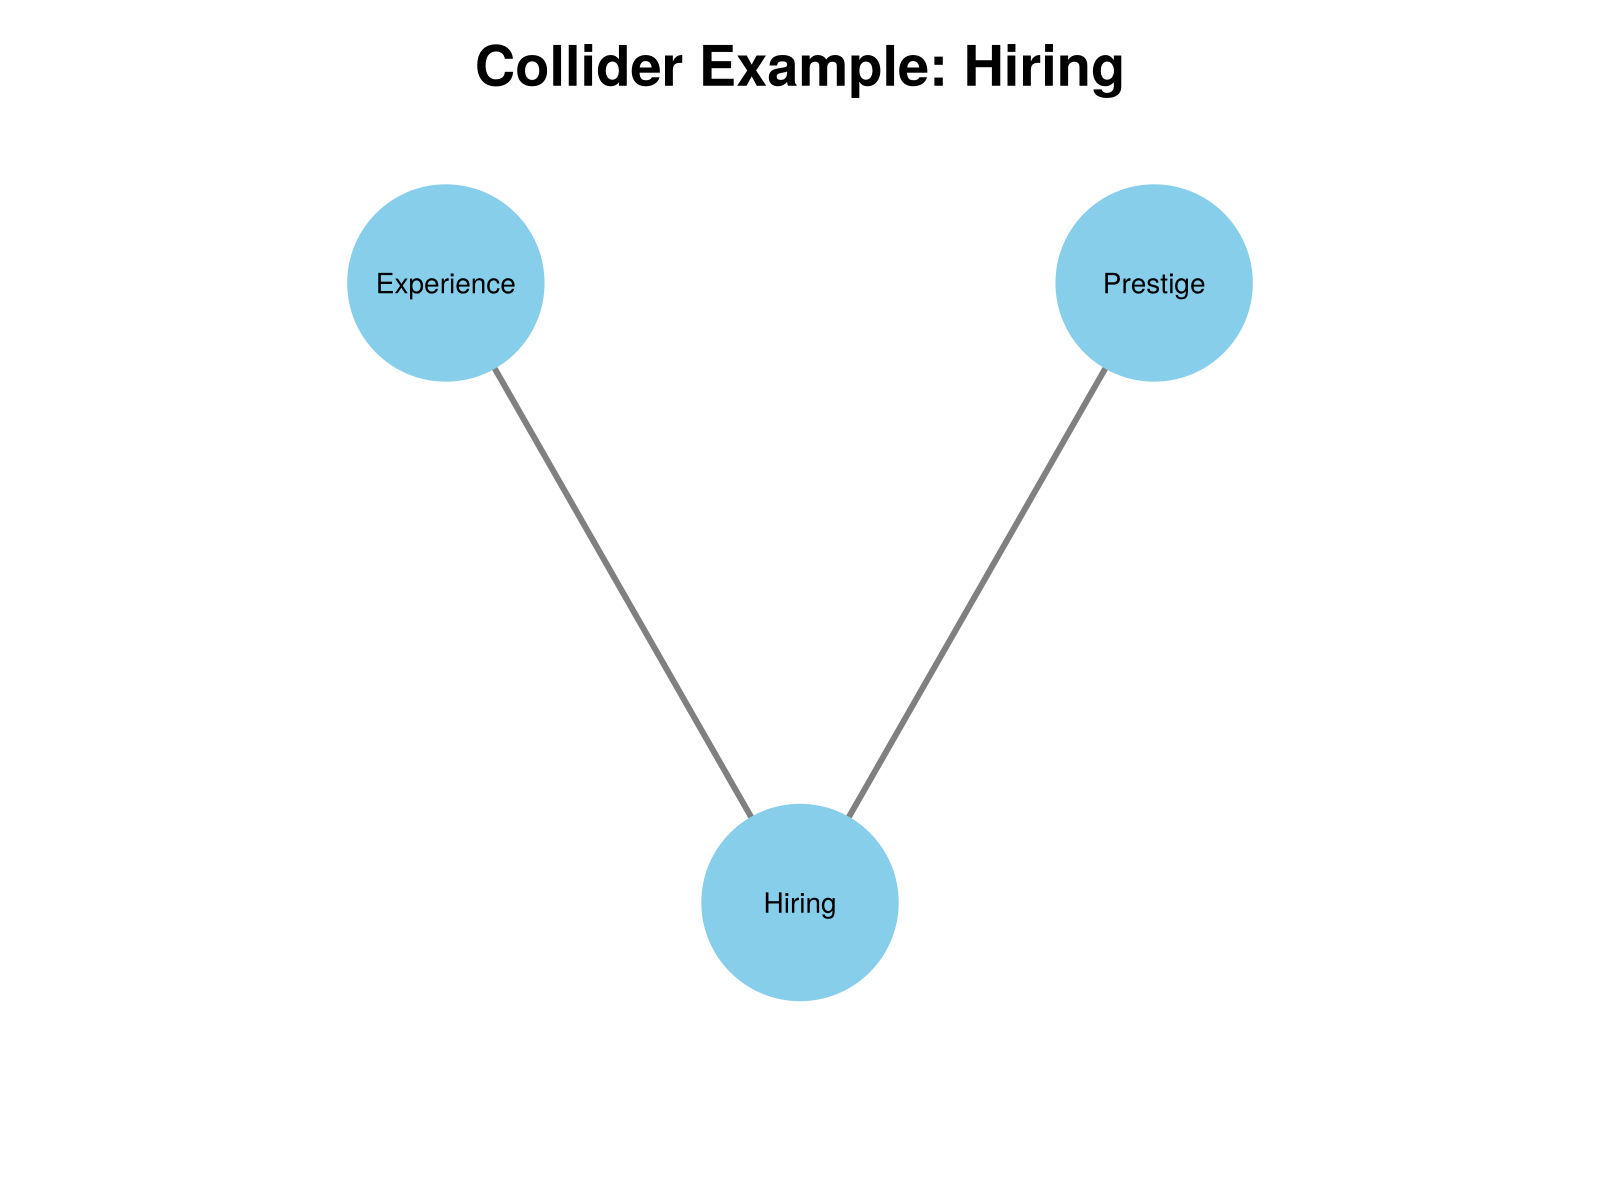

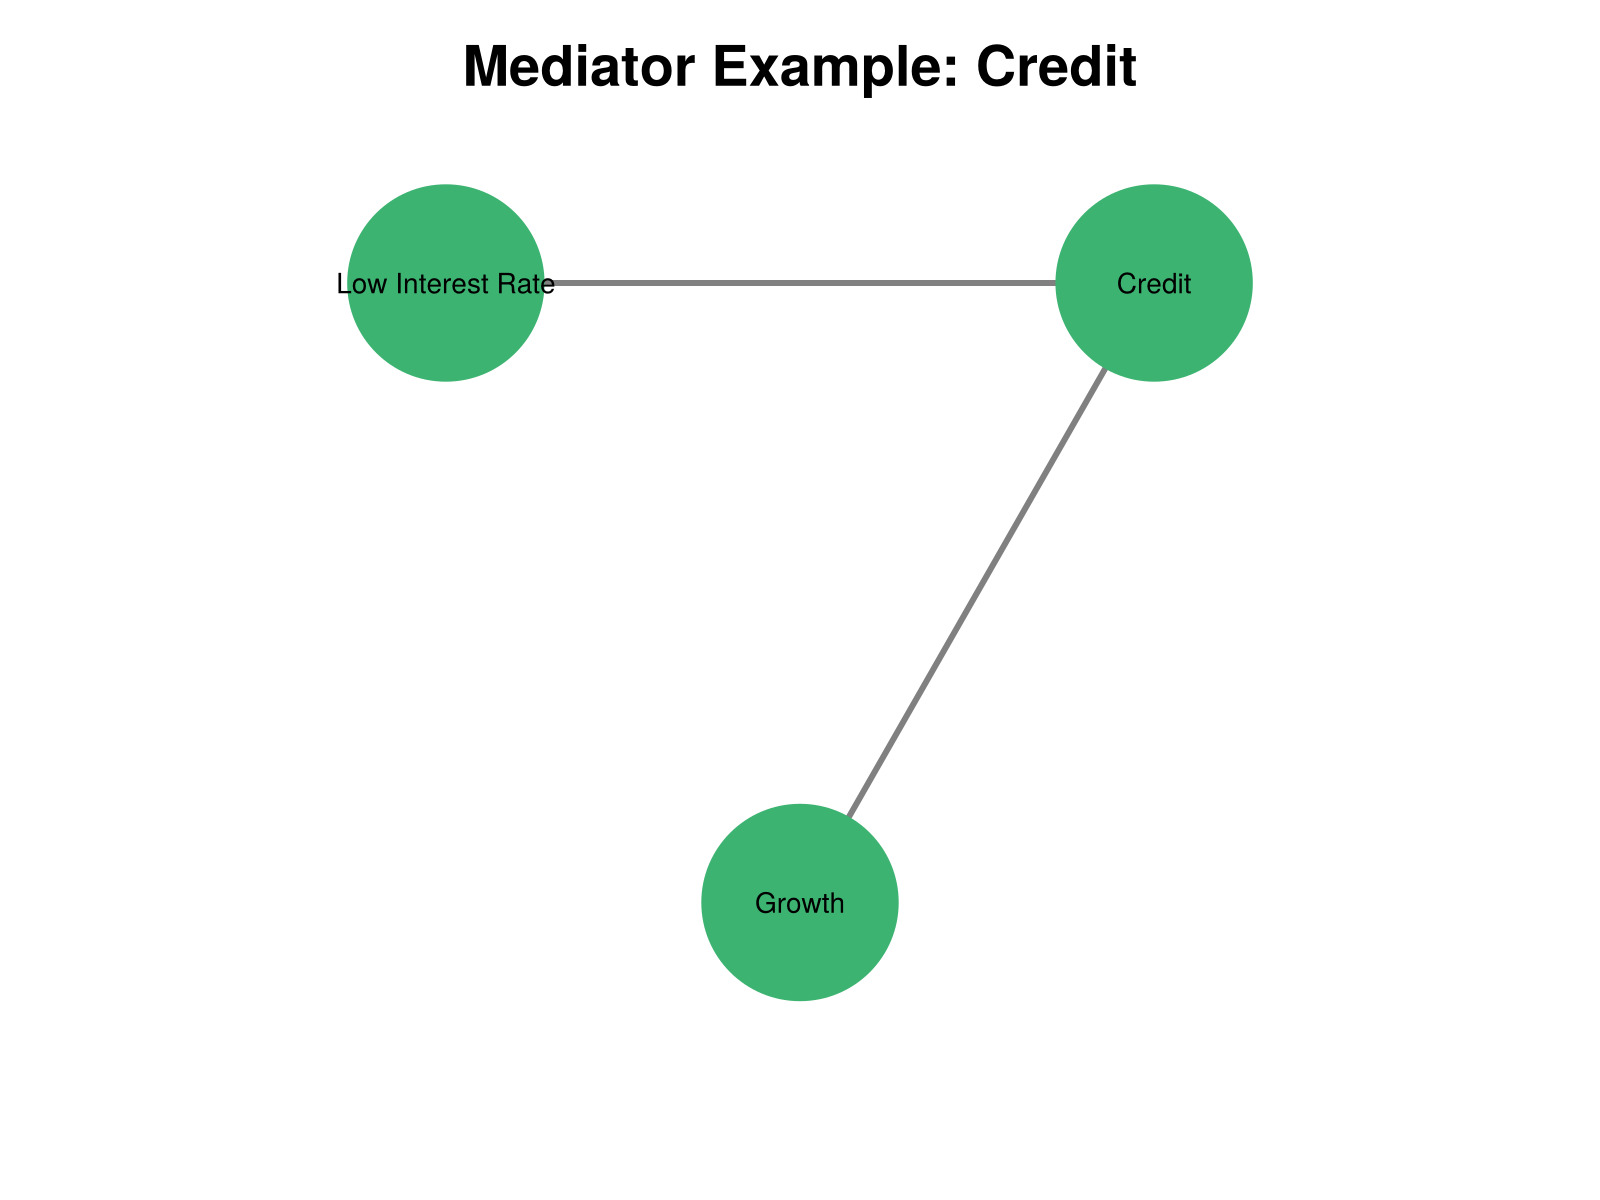

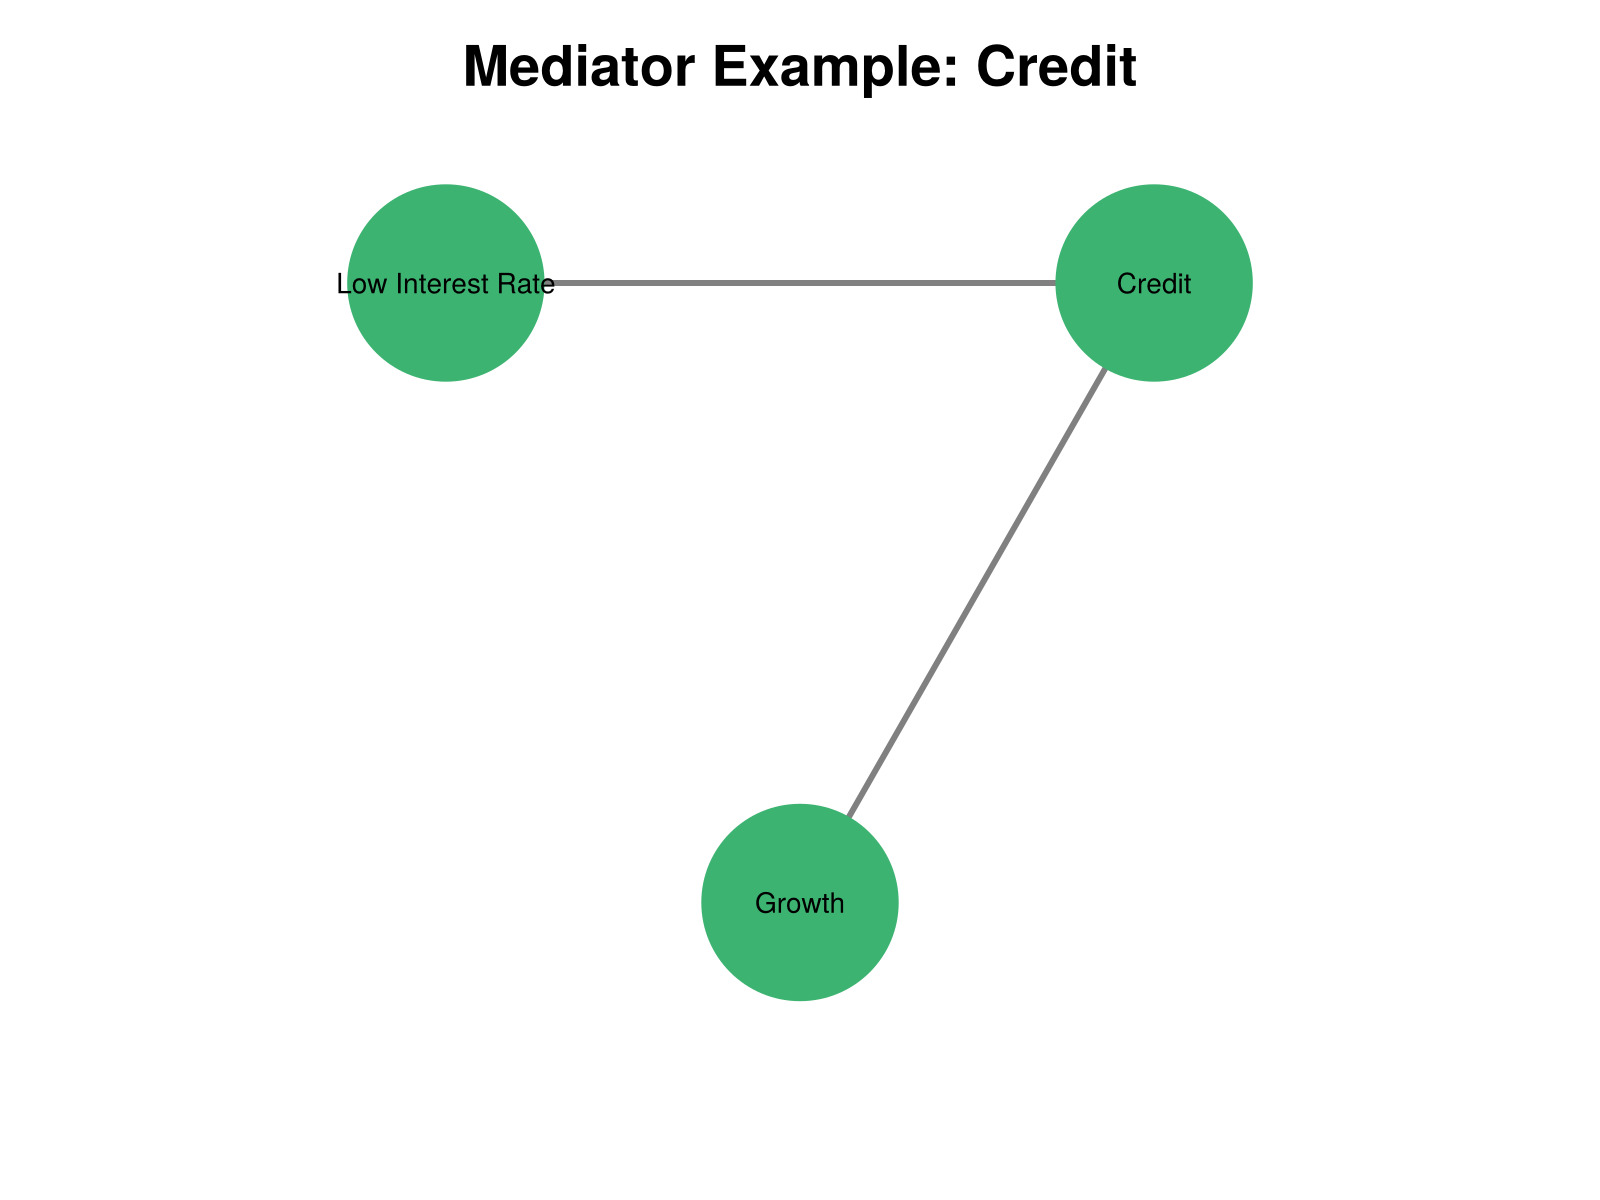

In [21]:
using Graphs
using GraphMakie
using CairoMakie

# === Función genérica ===
function draw_dag(edges, labels; title="", color=:lightblue)
    n = length(labels)
    g = DiGraph(n)
    for (src, dst) in edges
        add_edge!(g, src, dst)
    end

    # Posiciones fijas y centradas (dos arriba, uno abajo)
    positions = Dict(
        1 => Point2f(-0.8, 0.8),
        2 => Point2f(0.8, 0.8),
        3 => Point2f(0.0, -0.6)
    )

    fig = Figure(size = (800, 600), backgroundcolor = :white)
    ax = Axis(fig[1, 1];
        title = title,
        titlesize = 28,
        aspect = DataAspect(),
        xgridvisible = false,
        ygridvisible = false,
        xticklabelsvisible = false,
        yticklabelsvisible = false,
        xticksvisible = false,
        yticksvisible = false,
        topspinevisible = false,
        bottomspinevisible = false,
        leftspinevisible = false,
        rightspinevisible = false
    )

    # Dibujar el DAG
    graphplot!(
        ax, g;
        layout = [positions[i] for i in 1:n],
        nlabels = labels,
        nlabels_align = (:center, :center),
        node_color = color,
        node_size = 140,
        edge_color = :gray,
        edge_width = 3,
        arrow_show = true,
        arrow_size = 35,
        arrow_shift = -18,
        nlabels_textsize = 26
    )

    # Centrar visualmente
    limits!(ax, -1.5, 1.5, -1.2, 1.2)

    display(fig)
    return fig
end

# === Graficos individuales ===

# 1. Confounder
draw_dag(
    [(1,2),(1,3),(2,3)],
    ["Income","Education","Consumption"];
    title = "Confounder Example: Income",
    color = :lightcoral
)

# 2. Collider
draw_dag(
    [(1,3),(2,3)],
    ["Experience","Prestige","Hiring"];
    title = "Collider Example: Hiring",
    color = :skyblue
)

# 3. Mediator
draw_dag(
    [(1,2),(2,3)],
    ["Low Interest Rate","Credit","Growth"];
    title = "Mediator Example: Credit",
    color = :mediumseagreen
)
